In [1]:
import splat
import wisps
import numpy as np
import matplotlib.pyplot as plt
from wisps import Annotator as an
from wisps import datasets
import pandas as pd
from tqdm import tqdm
%matplotlib inline

In [2]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_df=datasets['traing_set']

In [4]:
feats=['CH_4/H-Cont', 'CH_4/H_2O-1', 'CH_4/H_2O-2', 'CH_4/J-Cont',
       'H-cont/H_2O-1', 'H-cont/H_2O-2', 'H-cont/J-Cont', 'H_2O-1/J-Cont',
       'H_2O-2/H_2O-1', 'H_2O-2/J-Cont',  'spex_chi', 'snr2', 'snr1',
       'line_chi', 'x', 'f_test_cdf', 'spt']
train_df['x']=train_df.spex_chi/train_df.line_chi

In [5]:
unc_columns=[x+'er' for x in wisps.INDEX_NAMES]
features=feats

In [6]:
prblm_feats=['line_chi', 'spex_chi', 'H_2O-2/J-Cont', 'H-cont/J-Cont', 'H_2O-1/J-Cont', 'H-cont/H_2O-1', 'snr2', 'x']
#pred_df[prblm_feats]=pred_df[prblm_feats].applymap(np.log10).replace(np.inf, np.nan).replace(-np.inf, np.nan).replace(np.nan, -999999.9)
train_df[prblm_feats]=train_df[prblm_feats].applymap(np.float).applymap(np.log10).replace(np.inf, np.nan).replace(-np.inf, np.nan).replace(np.nan, -999999.9)

In [7]:
def make_label_binary(labl):
    ##only two labels
    if labl >0.:
        return 1.
    else:
        return 0.

In [8]:
train_df['label']=train_df['label'].apply(make_label_binary)

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [10]:
def compute_accuracy_score(features):
    scaler = MinMaxScaler(feature_range=(0, 1))
    #train_set=train_df[features]
    X_train, X_test, y_train, y_test = train_test_split(train_df[features].values, train_df['label'].values, test_size=0.5,  random_state=123456) ###grammar  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
    rf.fit(X_train, y_train)
    
    pred_labels = rf.predict(X_test)
    model_accuracy = accuracy_score(y_test, pred_labels)
    
    return model_accuracy
    

In [11]:
scores=[]
fets=[]
for f in tqdm(features):
    fets.append(f)
    scores.append(compute_accuracy_score(fets))

100%|██████████| 17/17 [02:15<00:00,  8.28s/it]


In [12]:
from matplotlib.ticker import MultipleLocator

In [28]:
fealables=['idx'+ str(idx+1) for idx in range(0, len(wisps.INDEX_NAMES)) ]
fealbls=np.append(fealables, ['spexchi', 'snrj', 'snrh',
       'linechi', 'ftestcdf', 'x', 'spt'])

In [29]:
fealbls=[x.upper() for x in fealbls ]

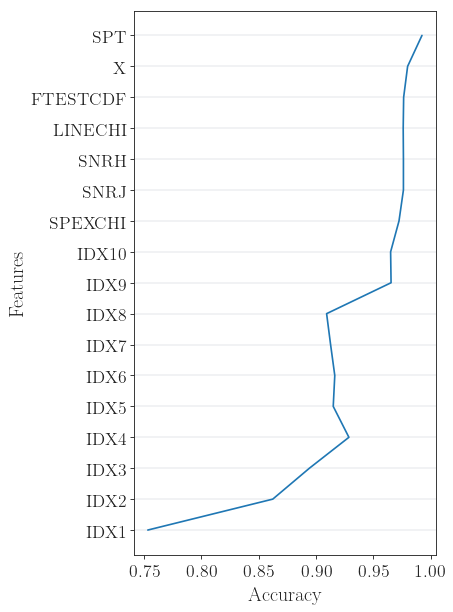

In [30]:
fig, ax=plt.subplots(figsize=(6, 8))

plt.plot(  scores,  np.arange(len(features))+1)
ml = MultipleLocator(2.)
ml2=MultipleLocator(.05)

ax.xaxis.set_major_locator(ml2)

plt.grid(axis='y')
plt.yticks( np.arange(len(features))+1, fealbls, rotation='horizontal')

plt.ylabel('Features')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/cv_scores.pdf')

In [16]:
for x, y in zip(features, scores): print (x,y)

CH_4/H-Cont 0.7532742681047766
CH_4/H_2O-1 0.8622881355932204
CH_4/H_2O-2 0.8942604006163328
CH_4/J-Cont 0.9287365177195686
H-cont/H_2O-1 0.9150616332819723
H-cont/H_2O-2 0.9164098613251156
H-cont/J-Cont 0.9127503852080123
H_2O-1/J-Cont 0.9092835130970724
H_2O-2/H_2O-1 0.9655238828967643
H_2O-2/J-Cont 0.9651386748844376
spex_chi 0.972457627118644
snr2 0.9763097072419107
snr1 0.9763097072419107
line_chi 0.9761171032357473
x 0.976502311248074
f_test_cdf 0.9799691833590138
spt 0.9924884437596302


In [17]:
import pandas as pd

In [18]:
df2=pd.read_pickle(wisps.LIBRARIES+'/labelled_by_rf.pkl')
df=wisps.datasets['candidates']
df3=pd.read_pickle(wisps.OUTPUT_FILES+'/selected_by_indices.pkl')

In [19]:
df5=df[df.spt.apply(splat.typeToNum)>19.]

In [20]:
df3=df3[df3.spt.apply(splat.typeToNum)>19.]

In [21]:
len(df2[df2.grism_id.isin(df5.grism_id)])

35

In [22]:
len(df3[df3.grism_id.isin(df5.grism_id)])

36

In [23]:
len(df3[df3.grism_id.isin(df5.grism_id)])

36

In [24]:
(len(df3)-19)/(len(df3))

0.9326241134751773

In [25]:
(len(df2)-30)/len(df2)

0.9393939393939394

In [26]:
(len(df2)-30)/len(df2)

0.9393939393939394

In [27]:
len(df5)

36